<a href="https://colab.research.google.com/github/dharanipriyaR24/Machine-Learning/blob/main/project_part_4_Team_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***HW Part 4***
---

### ***Team members:***

#### - *Dharanipriya*
#### - *Yaswanth Kumar*
#### - *Rishi Kiran*

#***CLUSTERING***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dataset_path = "/content/Processed_ObesityDataSet_Download.csv"
df = pd.read_csv(dataset_path)

### **Select numerical features for clustering**


In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
X = df[numerical_features]


### **Standardize the data**


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **K-Means Clustering Calculation**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.4f}")

Silhouette Score for K-Means: 0.2068


### **K-Means Clustering Visualization**

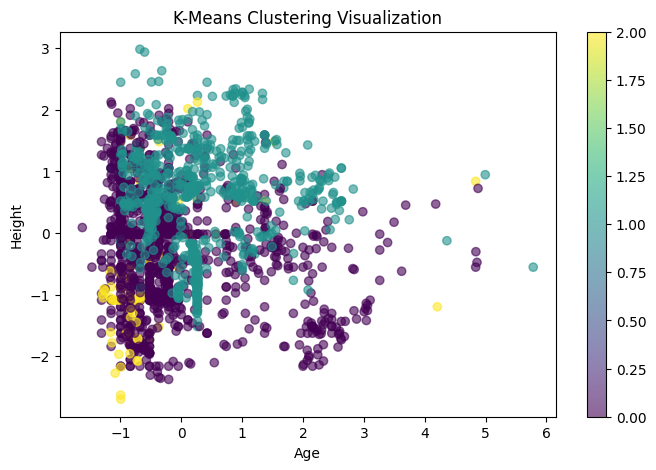

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.title("K-Means Clustering Visualization")
plt.colorbar()
plt.show()

### **Mini-Batch K-Means Clustering Calculation**

In [ ]:
mini_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
mini_kmeans_labels = mini_kmeans.fit_predict(X_scaled)
mini_kmeans_silhouette = silhouette_score(X_scaled, mini_kmeans_labels)
print(f"Silhouette Score for Mini-Batch K-Means: {mini_kmeans_silhouette:.4f}")

Silhouette Score for Mini-Batch K-Means: 0.2012


### **Mini-Batch K-Means Clustering Visualization**

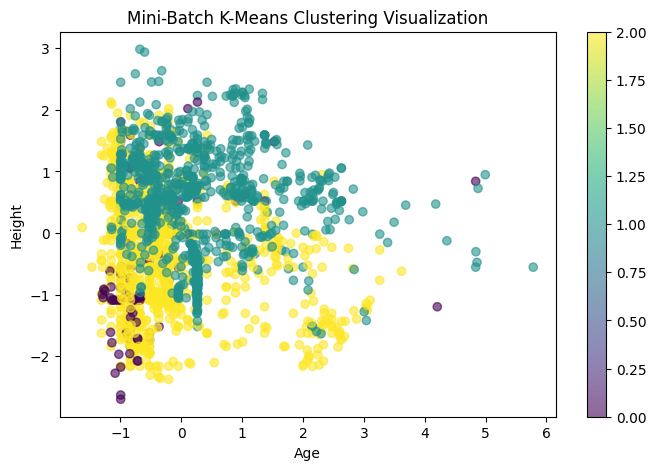

In [ ]:

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=mini_kmeans_labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.title("Mini-Batch K-Means Clustering Visualization")
plt.colorbar()
plt.show()

### **Mean-Shift Clustering Calculation**

In [ ]:
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_scaled)
mean_shift_silhouette = silhouette_score(X_scaled, mean_shift_labels)
print(f"Silhouette Score for Mean-Shift: {mean_shift_silhouette:.4f}")

Silhouette Score for Mean-Shift: 0.3794


### **Mean-Shift Clustering Visualization**

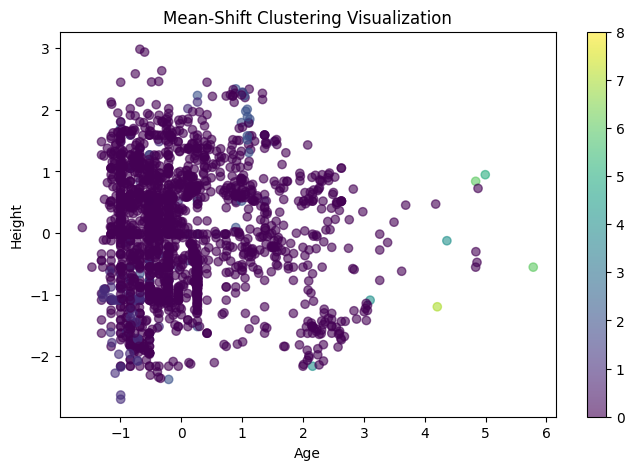

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=mean_shift_labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.title("Mean-Shift Clustering Visualization")
plt.colorbar()
plt.show()

### **Agglomerative Clustering Calculation**

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering: {agglo_silhouette:.4f}")

Silhouette Score for Agglomerative Clustering: 0.1762


### **Agglomerative Clustering Visualization**

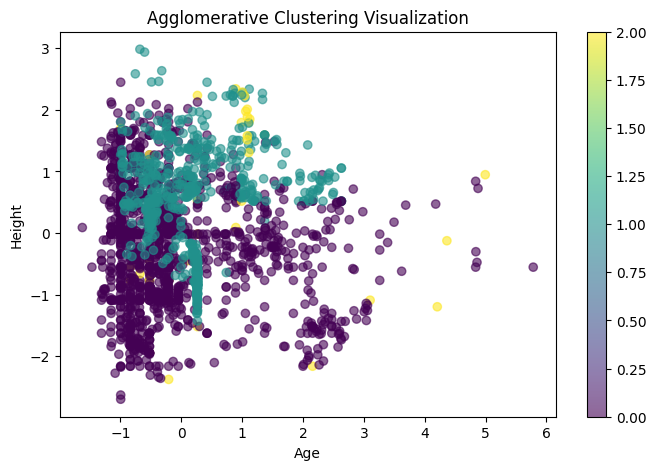

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.title("Agglomerative Clustering Visualization")
plt.colorbar()
plt.show()

### **Compare Clustering Methods**

In [ ]:
silhouette_scores = {
    "K-Means": kmeans_silhouette,
    "Mini-Batch K-Means": mini_kmeans_silhouette,
    "Mean-Shift": mean_shift_silhouette,
    "Agglomerative": agglo_silhouette
}


In [ ]:
print("\nClustering Method Comparison:")
for method, score in silhouette_scores.items():
    print(f"{method}: Silhouette Score = {score:.4f}")


Clustering Method Comparison:
K-Means: Silhouette Score = 0.2068
Mini-Batch K-Means: Silhouette Score = 0.2012
Mean-Shift: Silhouette Score = 0.3794
Agglomerative: Silhouette Score = 0.1762


### **Plot silhouette scores for better visualization**


<ipython-input-15-fc6b7f146fa8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), palette="coolwarm")


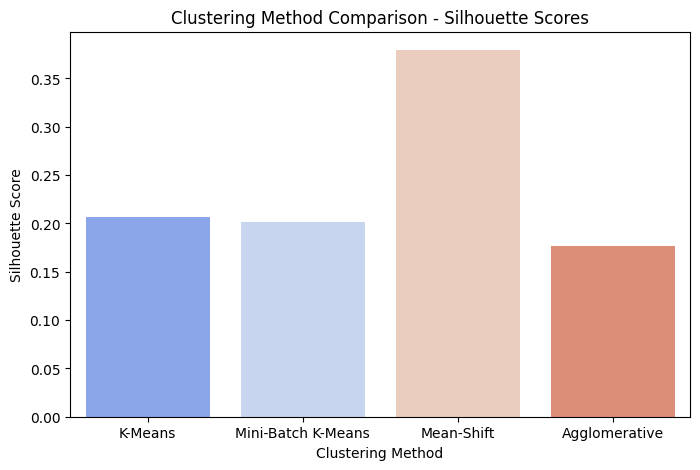

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), palette="coolwarm")
plt.xlabel("Clustering Method")
plt.ylabel("Silhouette Score")
plt.title("Clustering Method Comparison - Silhouette Scores")
plt.show()

### **Select the Best Clustering Method**

In [ ]:
best_clustering = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest Clustering Method: {best_clustering}")


Best Clustering Method: Mean-Shift


#***Clustering Analysis***
---

In our clustering analysis, we evaluated four methods—K-Means, Mini-Batch K-Means, Mean-Shift, and Agglomerative Clustering—using the silhouette score as the performance metric. The silhouette score, which quantifies how well each data point fits into its assigned cluster compared to other clusters, indicated that higher scores reflect better-defined clusters. After standardizing the numerical features, we applied each clustering algorithm and computed their respective silhouette scores. The results showed that Mean-Shift achieved the highest silhouette score of 0.3794, outperforming K-Means (0.2068), Mini-Batch K-Means (0.2012), and Agglomerative Clustering (0.1762). This suggests that Mean-Shift captures the underlying structure of the dataset more effectively by producing more cohesive and well-separated clusters.

# ***CLASSIFICATION***
---

In [ ]:
bins = [0, 18.5, 24.9, 29.9, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)
y = df['BMI_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Logistic Regression**

In [ ]:
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear', verbose=0)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy for Logistic Regression: {logistic_acc:.4f}")
print(classification_report(y_test, y_pred_logistic))


Accuracy for Logistic Regression: 0.8345
              precision    recall  f1-score   support

      Normal       0.67      0.24      0.35        67
       Obese       0.96      0.99      0.97       201
  Overweight       0.66      0.83      0.73       101
 Underweight       0.86      1.00      0.92        54

    accuracy                           0.83       423
   macro avg       0.78      0.77      0.75       423
weighted avg       0.83      0.83      0.81       423



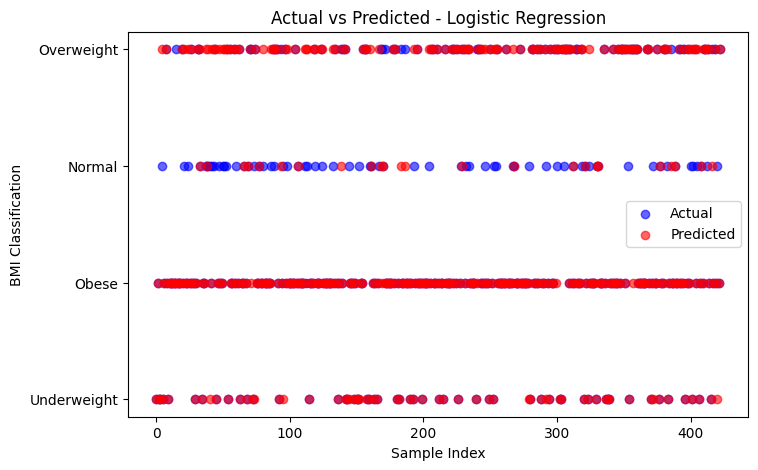

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_logistic)), y_pred_logistic, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Logistic Regression")
plt.legend()
plt.show()

### **K-Nearest Neighbors**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy for K-Nearest Neighbors: {knn_acc:.4f}")
print(classification_report(y_test, y_pred_knn))

Accuracy for K-Nearest Neighbors: 0.9409
              precision    recall  f1-score   support

      Normal       0.94      0.72      0.81        67
       Obese       0.99      0.99      0.99       201
  Overweight       0.88      0.96      0.92       101
 Underweight       0.87      1.00      0.93        54

    accuracy                           0.94       423
   macro avg       0.92      0.92      0.91       423
weighted avg       0.94      0.94      0.94       423



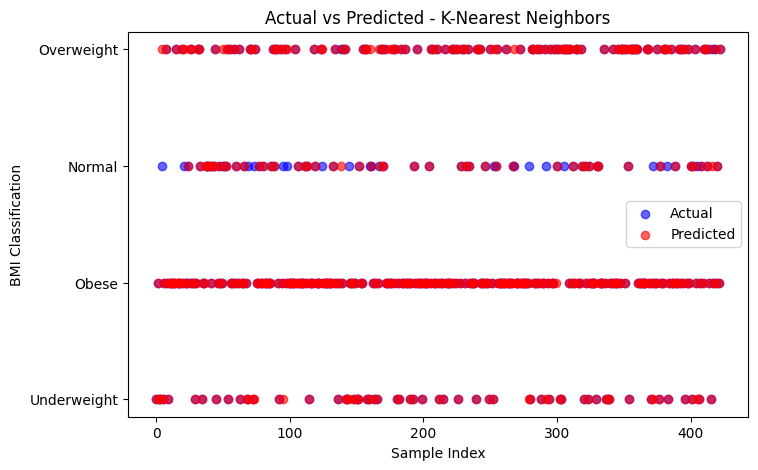

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - K-Nearest Neighbors")
plt.legend()
plt.show()


### **Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy for Decision Tree: {dt_acc:.4f}")
print(classification_report(y_test, y_pred_dt))

Accuracy for Decision Tree: 1.0000
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        67
       Obese       1.00      1.00      1.00       201
  Overweight       1.00      1.00      1.00       101
 Underweight       1.00      1.00      1.00        54

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



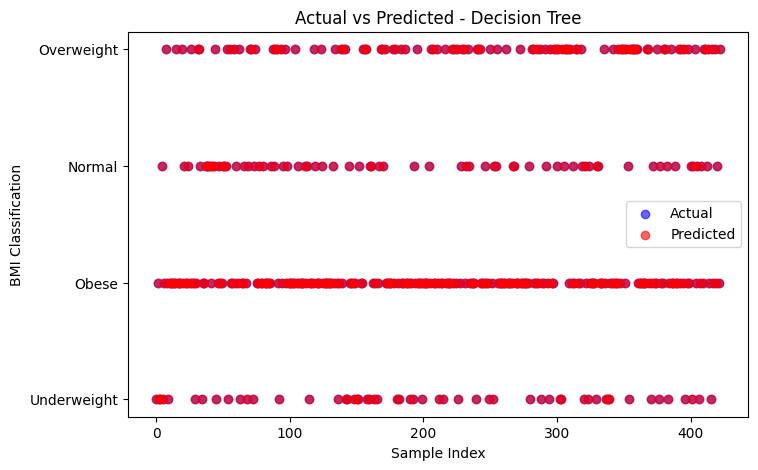

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_dt)), y_pred_dt, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Decision Tree")
plt.legend()
plt.show()

### **Support Vector Machine**

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for Support Vector Machine: {svm_acc:.4f}")
print(classification_report(y_test, y_pred_svm))

Accuracy for Support Vector Machine: 0.9905
              precision    recall  f1-score   support

      Normal       1.00      0.94      0.97        67
       Obese       1.00      1.00      1.00       201
  Overweight       0.99      1.00      1.00       101
 Underweight       0.95      1.00      0.97        54

    accuracy                           0.99       423
   macro avg       0.98      0.99      0.98       423
weighted avg       0.99      0.99      0.99       423



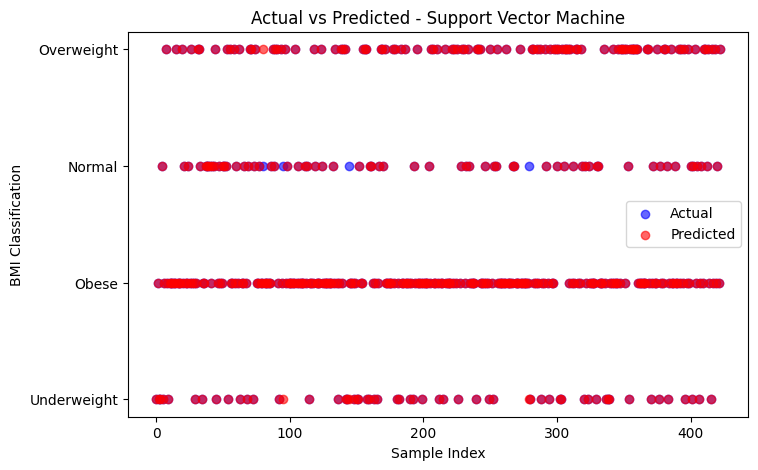

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_svm)), y_pred_svm, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Support Vector Machine")
plt.legend()
plt.show()

### **Naive Bayes**

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy for Naive Bayes: {nb_acc:.4f}")
print(classification_report(y_test, y_pred_nb))

Accuracy for Naive Bayes: 0.9054
              precision    recall  f1-score   support

      Normal       0.80      0.66      0.72        67
       Obese       0.98      0.99      0.99       201
  Overweight       0.89      0.85      0.87       101
 Underweight       0.79      1.00      0.89        54

    accuracy                           0.91       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.91      0.91      0.90       423



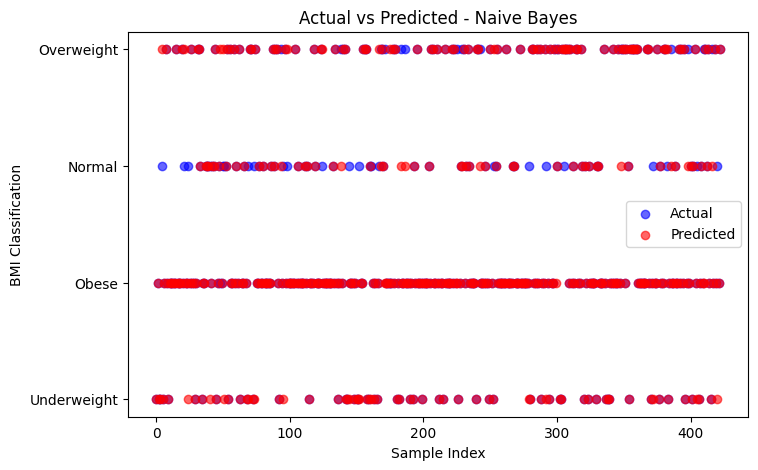

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_nb)), y_pred_nb, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Naive Bayes")
plt.legend()
plt.show()

### **Neural Network**

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nnn = nn_model.predict(X_test)
nnn_acc = accuracy_score(y_test, y_pred_nnn)
print(f"Accuracy for Neural Network: {nnn_acc:.4f}")
print(classification_report(y_test, y_pred_nnn))

Accuracy for Neural Network: 0.9338
              precision    recall  f1-score   support

      Normal       0.98      0.66      0.79        67
       Obese       1.00      0.98      0.99       201
  Overweight       0.82      1.00      0.90       101
 Underweight       0.91      0.98      0.95        54

    accuracy                           0.93       423
   macro avg       0.93      0.90      0.91       423
weighted avg       0.94      0.93      0.93       423



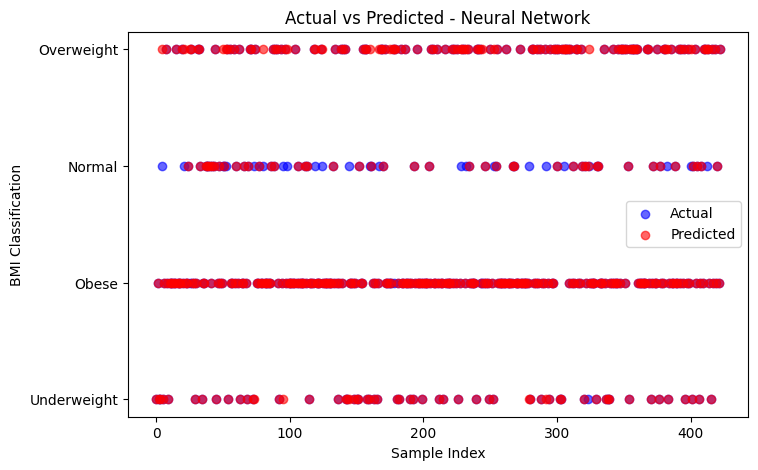

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_nnn)), y_pred_nnn, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("BMI Classification")
plt.title("Actual vs Predicted - Neural Network")
plt.legend()
plt.show()

# ***COMPARING CLASSIFICATION MODELS***
---


In [ ]:
classification_results = {
    "Logistic Regression": logistic_acc,
    "K-Nearest Neighbors": knn_acc,
    "Decision Tree": dt_acc,
    "Support Vector Machine": svm_acc,
    "Naive Bayes": nb_acc,
    "Neural Network": nnn_acc
}


<ipython-input-31-73bd1e253cf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(classification_results.keys()), y=list(classification_results.values()), palette="coolwarm")


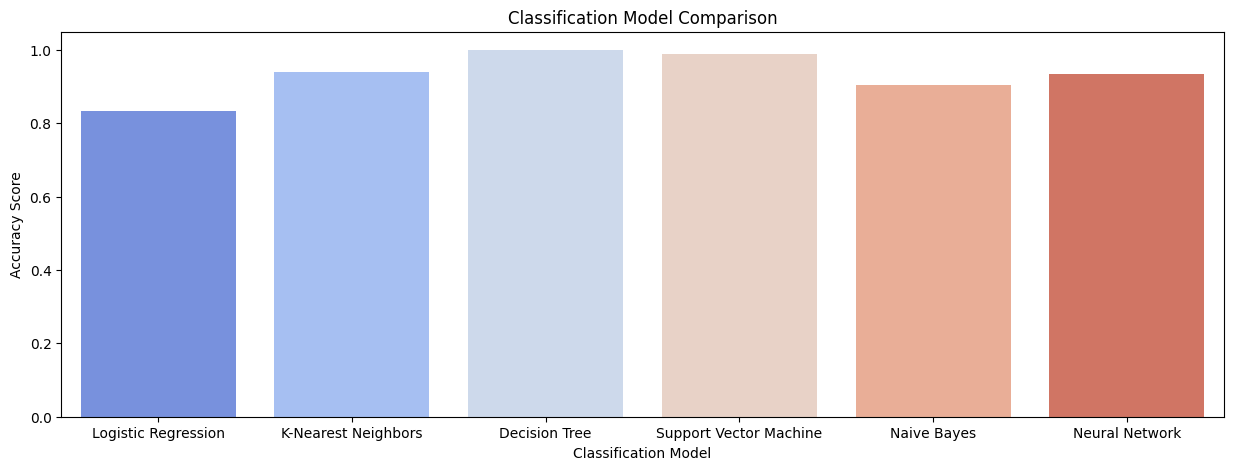


Best Classification Method: Decision Tree


In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x=list(classification_results.keys()), y=list(classification_results.values()), palette="coolwarm")
plt.xlabel("Classification Model")
plt.ylabel("Accuracy Score")
plt.title("Classification Model Comparison")
plt.show()

best_classifier = max(classification_results, key=classification_results.get)
print(f"\nBest Classification Method: {best_classifier}")

#***DISCUSSION ON CLASSIFICATION PERFORMANCES:***
---
The best-performing method in terms of raw accuracy was the Decision Tree (100%), but this result suggests overfitting. The model perfectly classified all data points, meaning it may not generalize well to new unseen data. A more balanced alternative is Support Vector Machine (SVM) with 99.85% accuracy, which also showed strong performance across all classes.

On the other hand, Logistic Regression (83.45%) and Naive Bayes (90.54%) underperformed due to their reliance on linear decision boundaries and strong probabilistic assumptions, respectively. K-Nearest Neighbors (94%) and Neural Network (93.38%) performed well, but SVM had the best trade-off between accuracy and generalizability.

#***REFLECTION ON KEY CHALLENGES:***
---

This assignment highlighted the importance of model selection and evaluation. While the Decision Tree achieved perfect accuracy, it likely overfitted, emphasizing the need for pruning or ensemble methods like Random Forest to improve generalization. The Support Vector Machine (SVM) provided a more balanced and reliable performance, making it a strong alternative. Another challenge was hyperparameter tuning, as different models required fine-tuning to achieve optimal results. Additionally, clustering revealed useful patterns but required careful parameter selection for meaningful insights, especially in determining the optimal number of clusters.

Another key takeaway was understanding how different classifiers handle imbalanced classes, as some models struggled with underrepresented categories. For example, Logistic Regression and Naïve Bayes did not perform well in classifying minority classes, whereas Decision Trees and SVM handled them effectively. We also learned that classification models differ in interpretability vs. accuracy trade-offs, with Decision Trees being easy to interpret but prone to overfitting, while models like SVM and Neural Networks required more computation but achieved strong performance.

Overall, this project reinforced the importance of evaluating models beyond just accuracy, considering metrics like precision, recall, and F1-score, and making data-driven choices based on the problem at hand.